# Social_Network_Ads Data set

In [1]:
import pandas as pd
data=pd.read_csv(r"E:\PYTHON\python Datasets\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Objective of the porject

The objective of the project is to determine if a person will buy a product displayed on a social network

## EDA

In [3]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

C:\Users\Nithin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


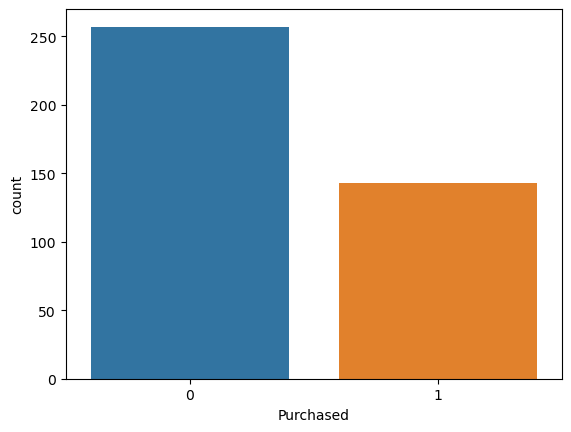

In [4]:
sns.countplot(data.Purchased)
plt.show()

In [5]:
data.shape

(400, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
from pandas_profiling import ProfileReport
Report=ProfileReport(data)
Report.to_file(output_file='SocialReport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data.drop('User ID',axis=1,inplace=True)

In [9]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### |       Summary:

> **For Age:**
1.  The mean value is 38 i.e. on an average the value of age attribute is 38.
2.  Age is having the standerd deviation 10.48 which indicates the deviation of an observation from the mean.    
3.  The value of Age attribute varies from 18 to 60.
4.  The 1st quartile is 30 i.e. 25% of the observations lies below 30.
5.  3rd quartile is 46 which indicates that in 75% of the observations the value of age is less than 46.

> **For EstimatedSalary:**
1. The mean value is around 69742.5 ie, average estimated Salary is around 70000
2. Salary having std 34097 
3. the salary range between 150000 and 15000 
4. 75% People get salary below 88000


### Univariate analysis

> **AGE**

Distribution

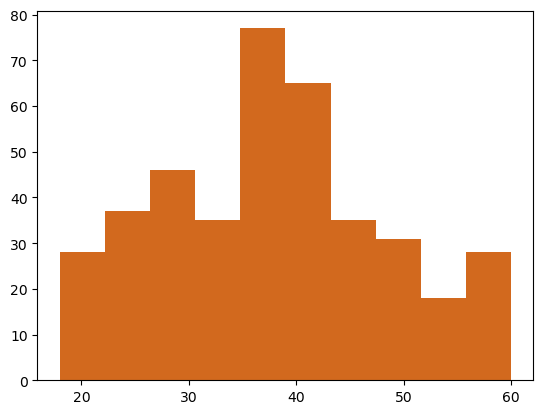

In [11]:
plt.hist(data.Age,color='chocolate')
plt.show()

> **Salary**

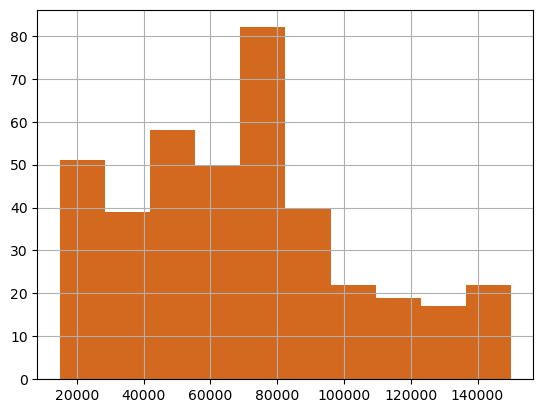

In [12]:
data.EstimatedSalary.hist(color='chocolate')
plt.show()

it is right-skewed ie, most people getting salary below 80000

> **Gender**

C:\Users\Nithin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


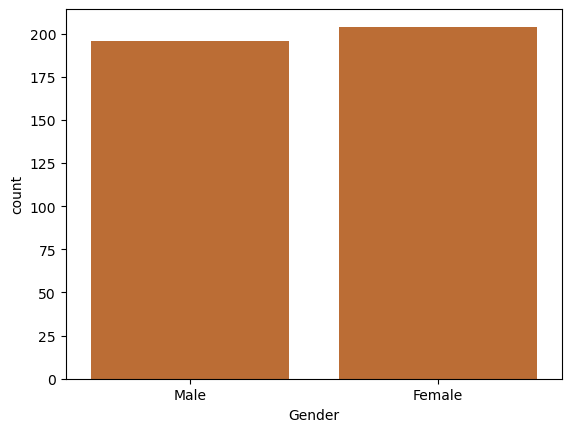

In [13]:
sns.countplot(data.Gender,color='chocolate')
plt.show()

 > **Purchase**

C:\Users\Nithin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


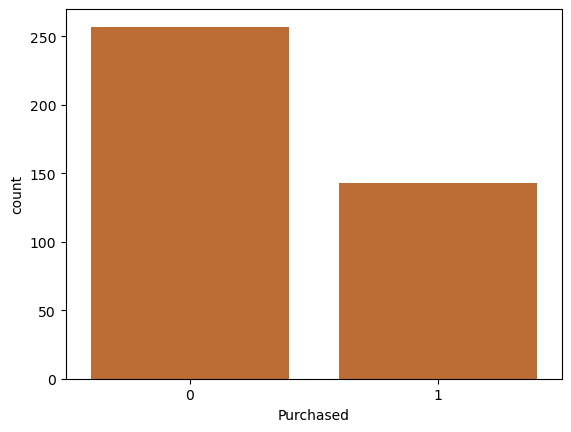

In [14]:
sns.countplot(data.Purchased,color='chocolate')
plt.show()

Social network ads were displayed by only 1/3 of people buying

## Bivariate analysis

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)

In [16]:
data.head(1)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0


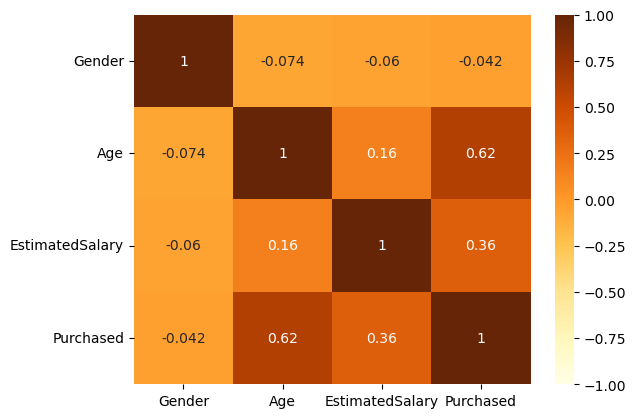

In [17]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap=sns.color_palette("YlOrBr", as_cmap=True))
plt.show()

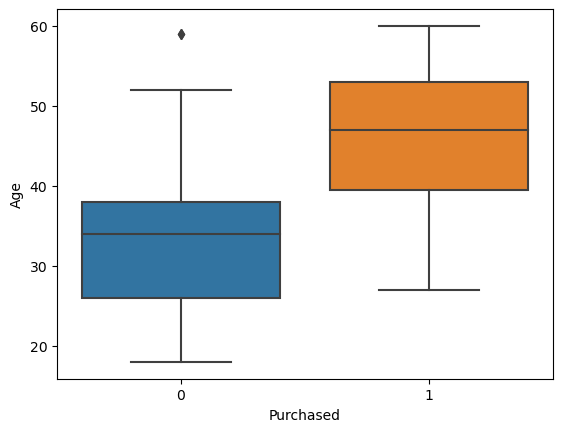

In [18]:
sns.boxplot(x="Purchased", y="Age", data=data)
plt.show()

1. Above 40-year-olds are likely to buy products displayed on social networks
2. the iqr range of 0 is 27 to 38
2. iqr of 1 is 40 to 53

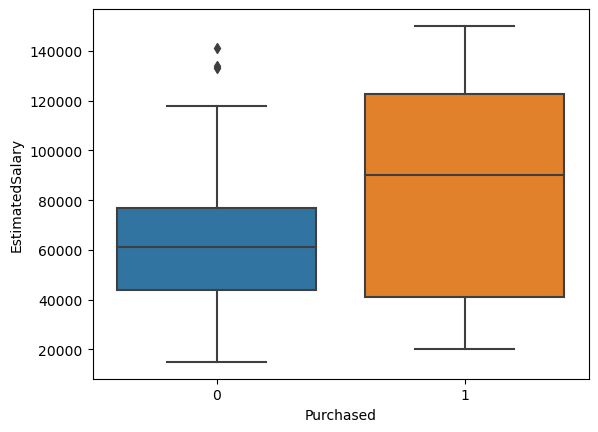

In [19]:
sns.boxplot(x="Purchased", y="EstimatedSalary", data=data)
plt.show()

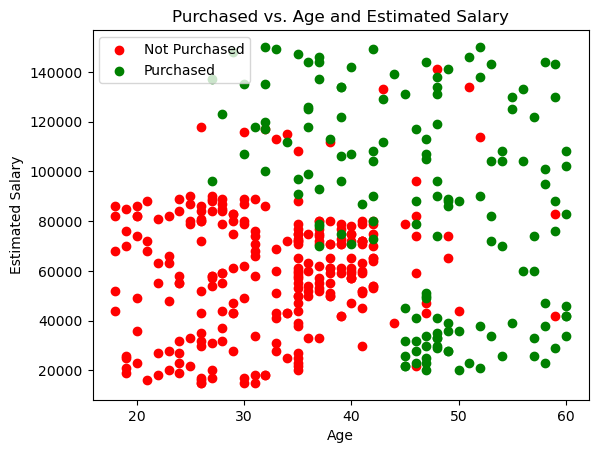

In [20]:
plt.scatter(data.Age[data.Purchased == 0], data.EstimatedSalary[data.Purchased == 0], color = 'red')
plt.scatter(data.Age[data.Purchased == 1], data.EstimatedSalary[data.Purchased == 1], color = 'green')
plt.title('Purchased vs. Age and Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(['Not Purchased', 'Purchased'])
plt.show()


1. above salary 40000 perosn likely to buy products
2. iqr between 40000 to 120000
3. salary bewteen (iqr 40000 to 80000) Not buying 

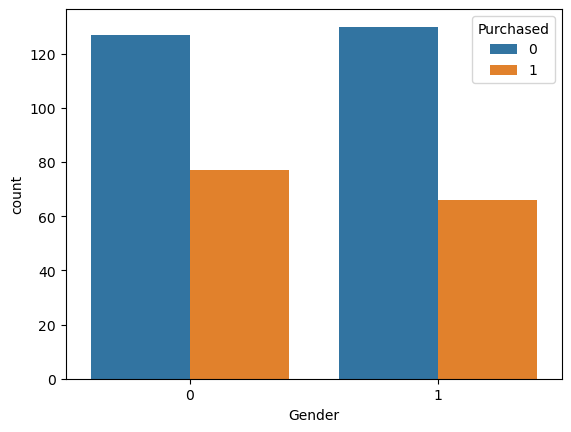

In [21]:
sns.countplot(x="Gender", hue="Purchased", data=data)
plt.show()

1. The purchasing habit of female and male is almost same

### Splitting the dataset into the Training set and Test set

In [22]:
X = data.iloc[:, [2, 3]].values
y = data.Purchased.values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
buy=DecisionTreeClassifier(criterion='entropy',random_state=0)
buy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Predicting

In [27]:
y_pred=buy.predict(X_test)

#### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[68  0]
 [ 0 32]]


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        32

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



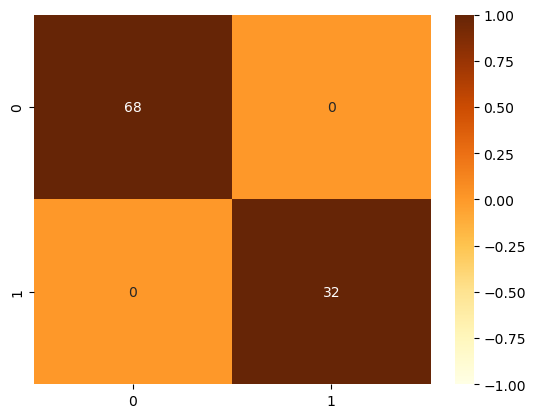

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,vmax=1,vmin=-1,cmap=sns.color_palette("YlOrBr", as_cmap=True))
plt.show()

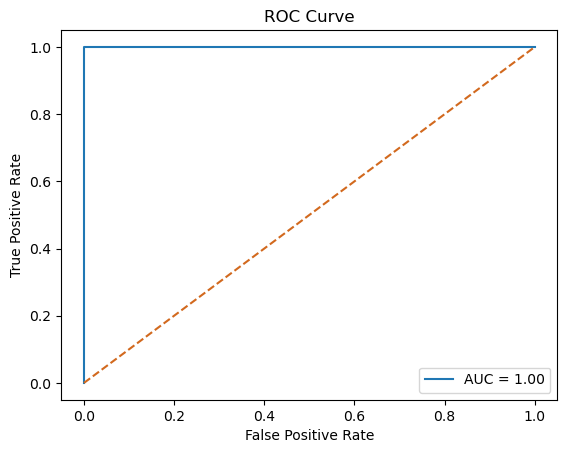

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], '--',c='chocolate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


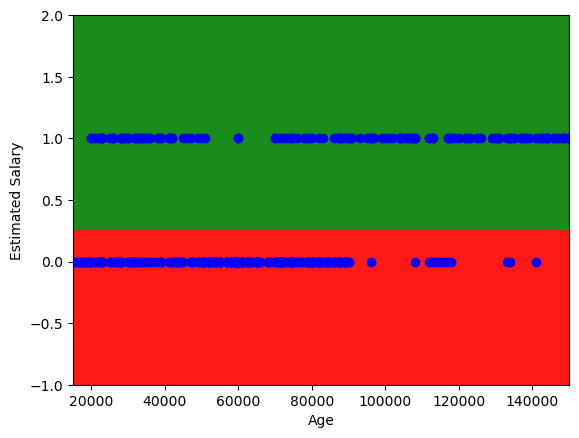

In [34]:
from matplotlib.colors import ListedColormap
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = buy.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=.9,cmap = ListedColormap(('red', 'green')))
plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()